In [ ]:

import numpy as np

# Sample questionnaire on social anxiety (5-point Likert scale: 0 to 4)
questions = [
    "How anxious do you feel when introducing yourself to a group?",
    "How likely are you to avoid eye contact during conversations?",
    "How uncomfortable do you feel when speaking in public?",
    "How often do you avoid asking questions in a group setting?"
]

def collect_likert_responses():
    responses = []
    for q in questions:
        while True:
            try:
                r = int(input(f"{q} (0-4): "))
                if r in range(5):
                    responses.append(r)
                    break
                else:
                    print("Please enter a number between 0 and 4.")
            except ValueError:
                print("Invalid input. Please enter a number.")
    return responses

def calculate_sas(responses):
    # Likert Scale Weighted Mean Calculation
    fi = np.array([1] * len(responses))  # Frequency array (each question answered once)
    xi = np.array(responses)  # Response values
    sas = np.sum(fi * xi) / np.sum(fi)
    return sas

# Example Run
responses = collect_likert_responses()
sas_score = calculate_sas(responses)
print(f"Initial Social Anxiety Score (SAS): {sas_score:.2f}")


How anxious do you feel when introducing yourself to a group? (0-4): 5
Please enter a number between 0 and 4.
How anxious do you feel when introducing yourself to a group? (0-4): 1
How likely are you to avoid eye contact during conversations? (0-4): 4
How uncomfortable do you feel when speaking in public? (0-4): 3
How often do you avoid asking questions in a group setting? (0-4): 2
Initial Social Anxiety Score (SAS): 2.50


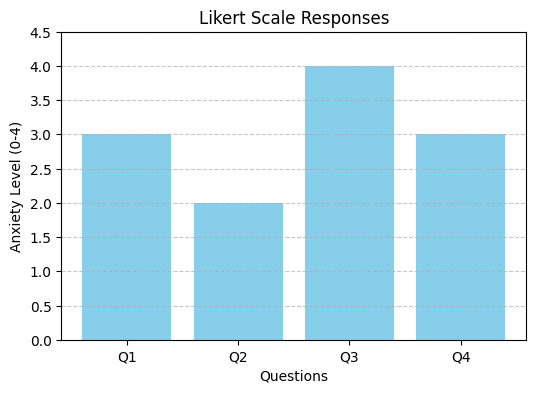

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated Likert responses (values between 0–4)
questions = ['Q1', 'Q2', 'Q3', 'Q4']
likert_responses = [3, 2, 4, 3]  # You can replace with user input

# Generate bar chart
plt.figure(figsize=(6, 4))
plt.bar(questions, likert_responses, color='skyblue')
plt.title('Likert Scale Responses')
plt.xlabel('Questions')
plt.ylabel('Anxiety Level (0-4)')
plt.ylim(0, 4.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:


import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def analyze_text_sentiment(response_text):
    sentiment_score = sia.polarity_scores(response_text)['compound']
    if sentiment_score > 0.2:
        return "Positive", sentiment_score
    elif sentiment_score < -0.2:
        return "Negative", sentiment_score
    else:
        return "Neutral", sentiment_score

user_response = input("Describe how you feel in social situations: ")
sentiment, score = analyze_text_sentiment(user_response)
print(f"Sentiment: {sentiment}, Sentiment Score: {score:.2f}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Describe how you feel in social situations: bad
Sentiment: Negative, Sentiment Score: -0.54


In [ ]:
def categorize_anxiety(sas_score, sentiment_score):
    if sas_score < 1.5 and sentiment_score > 0:
        return "Low"
    elif sas_score < 3.0 or sentiment_score > -0.2:
        return "Moderate"
    else:
        return "High"

sas_score = float(input("Enter SAS Score: "))
sentiment_score = float(input("Enter Sentiment Score: "))

anxiety_level = categorize_anxiety(sas_score, sentiment_score)

print(f"Anxiety Level: {anxiety_level}")


Enter SAS Score: 2.50
Enter Sentiment Score: -0.54
Anxiety Level: Moderate


In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")  # Change model if needed

def generate_ai_deck_card(anxiety_level):
    # Define level-based questions and suggestions
    level_data = {
        "low": {
            "question": "What’s a fun fact about yourself that not many people know?",
            "suggestion": "Try sharing a fun fact about yourself in a casual conversation."
        },
        "moderate": {
            "question": "What’s one topic you feel comfortable talking about with new people?",
            "suggestion": "Practice small talk by initiating a conversation with someone new this week."
        },
        "high": {
            "question": "What’s one small step you can take to feel more comfortable in social settings?",
            "suggestion": "Start with self-reflection—write down your social fears and ways to overcome them."
        }
    }

    # Convert user input to lowercase and validate
    anxiety_level = anxiety_level.lower()
    if anxiety_level not in level_data:
        return "Invalid anxiety level. Please enter Low, Moderate, or High."

    # Fetch the corresponding question and suggestion
    question = level_data[anxiety_level]["question"]
    suggestion = level_data[anxiety_level]["suggestion"]

    return f"🃏 AI-Generated Deck Card:\n💬 Question: {question}\n\n💡 Suggestion: {suggestion}"

# Get user input
anxiety_level = input("Enter anxiety level (Low, Moderate, High): ")
deck_card = generate_ai_deck_card(anxiety_level)

print(deck_card)


Device set to use cpu


Enter anxiety level (Low, Moderate, High): moderate
🃏 AI-Generated Deck Card:
💬 Question: What’s one topic you feel comfortable talking about with new people?

💡 Suggestion: Practice small talk by initiating a conversation with someone new this week.


In [ ]:
def determine_next_phase(current_phase, response_analysis):
    if response_analysis['avoidance_flag'] and response_analysis['sentiment'] == "Negative":
        return current_phase
    elif current_phase == "Ice Breakers" and response_analysis['sentiment'] in ["Neutral", "Positive"]:
        return "Bridge the Gap"
    elif current_phase == "Bridge the Gap" and response_analysis['sentiment'] == "Positive":
        return "Deep Dive"
    return current_phase

current_phase = "Ice Breakers"
response_analysis = {"avoidance_flag": False, "sentiment": "Positive"}

current_phase = determine_next_phase(current_phase, response_analysis)
print(f"Next Phase: {current_phase}")


Next Phase: Bridge the Gap


In [ ]:
def update_sas(existing_sas, response_analysis):
    if response_analysis['sentiment'] == "Positive" and not response_analysis['avoidance_flag']:
        return max(existing_sas - 0.2, 0)
    elif response_analysis['sentiment'] == "Negative":
        return min(existing_sas + 0.2, 4)
    return existing_sas

sas_score = float(input("Enter initial SAS score: "))
response_analysis = {"sentiment": "Positive", "avoidance_flag": False}

sas_score = update_sas(sas_score, response_analysis)
print(f"Updated SAS Score: {sas_score:.2f}")


Enter initial SAS score: 5
Updated SAS Score: 4.80


In [ ]:
def provide_feedback(sas_score):
    if sas_score < 1.5:
        return "You're showing great progress! Keep practicing social conversations to build even more confidence."
    elif sas_score < 3.0:
        return "You're improving! Try practicing eye contact and gradually initiating conversations."
    else:
        return "Consider starting with simpler social situations and practicing mindfulness techniques to manage anxiety."

sas_score = float(input("Enter SAS score: "))

print("\nFeedback:")
print(provide_feedback(sas_score))


Enter SAS score: 4.80

Feedback:
Consider starting with simpler social situations and practicing mindfulness techniques to manage anxiety.


Initial SAS Score: 3.0
Updated SAS Score: 2.8


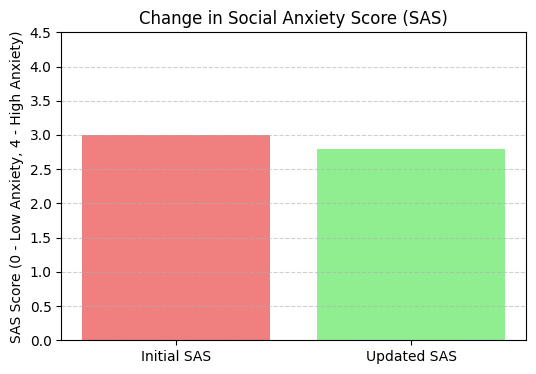

In [3]:
import matplotlib.pyplot as plt

# Example initial and updated SAS values
initial_sas = 3.0
sentiment = "Positive"  # This would come from sentiment analysis

# Update SAS based on sentiment
def update_sas(existing_sas, sentiment):
    if sentiment == "Positive":
        return max(existing_sas - 0.2, 0)
    elif sentiment == "Negative":
        return min(existing_sas + 0.2, 4)
    return existing_sas

updated_sas = update_sas(initial_sas, sentiment)

# Print both scores
print(f"Initial SAS Score: {initial_sas}")
print(f"Updated SAS Score: {updated_sas}")

# Visualize the change in SAS
plt.figure(figsize=(6, 4))
plt.bar(['Initial SAS', 'Updated SAS'], [initial_sas, updated_sas], color=['lightcoral', 'lightgreen'])
plt.title('Change in Social Anxiety Score (SAS)')
plt.ylim(0, 4.5)
plt.ylabel('SAS Score (0 - Low Anxiety, 4 - High Anxiety)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
